https://stats.idre.ucla.edu/other/mult-pkg/whatstat/
# 1 sample: OWC
### 1 OverWeight Cow
- if parametric and is ordinal and cont: one sample t test
- if non parametric and is ordinal/cont: wilcoxon rank sum test
- if categorical freq: chi2 test
# 2 samples
### 2 Trademarked Cows
- paired parametic ordinal/cont: paired t-test
- paired non-para ordinal/cont: wilcoxon matched pairs test
- unpaired para ordinal/cont: independent samples t-test... equal variance
- unpaired para ordinal/cont: welch's corrected unpaired t-test
- unpaired nonpara ordinal/cont: mann-whitney u test
- paired/unpaired categorical: chi2 test of independence
# 3 or more samples
## 3 AFAK's
- paired para: repeated measures one way ANOVA
- paired nonpara: friedman's test
- unpaired para: one way ANOVA
- unpaired nonpara: kruskal wallis test

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
% matplotlib inline

# Test for Normality 
- null hypothesis is that the data lies within a normal distribution
https://plot.ly/python/normality-test/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [15]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/wind_speed_laurel_nebraska.csv')
df = data[0:10]
print data.shape
df.head()

(221, 3)


,10 Min Std Dev,Time,10 Min Sampled Avg
0,2.73,2001-06-11 11:00,22.3
1,1.98,2001-06-11 11:10,23.0
2,1.87,2001-06-11 11:20,23.3
3,2.03,2001-06-11 11:30,22.0
4,3.10,2001-06-11 11:40,20.5


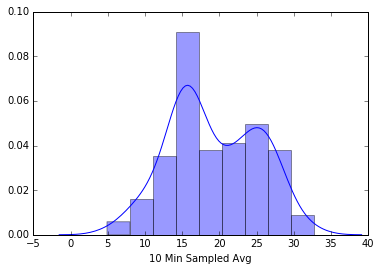

In [23]:
sns.distplot(data['10 Min Sampled Avg'])

## Shapiro-Wilk
The Shapiro-Wilk normality test is reputadely more well suited to smaller datasets.

In [20]:
x = data['10 Min Sampled Avg']

shapiro_results = stats.shapiro(x)
print 'test-stat/p-value'
shapiro_results

test-stat/p-value


(0.9725478887557983, 0.00026834625168703496)

## D’Agostino and Pearson
We can combine the D'Agostino and Pearson method to generate a new test which considers the kurtosis, the sharpest point on the curve.

In [24]:
dagostino_results = scipy.stats.mstats.normaltest(x)
print 'test-stat/p-value'
print dagostino_results

test-stat/p-value
NormaltestResult(statistic=18.478324458396983, pvalue=9.7158953070867229e-05)


In [9]:
from scipy import stats
pts = 1000
np.random.seed(28041990)
a = np.random.normal(0, 1, size=pts)
b = np.random.normal(2, 1, size=pts)
x = np.concatenate((a, b))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))
p = 3.27207e-11

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


p = 3.27207e-11
The null hypothesis can be rejected


## One-Sample T-Test
A one-sample t-test checks whether a sample mean differs from the population mean. Let's create some dummy age data for the population of voters in the entire country and a sample of voters in Minnesota and test the whether the average age of voters Minnesota differs from the population:

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html

In [ ]:
stats.ttest_1samp(a= minnesota_ages,               # Sample data
                 popmean= population_ages.mean())  # Pop mean

## Two Sample T-test

A two-sample t-test investigates whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same. Unlike the one sample-test where we test against a known population parameter, the two sample test only involves sample means. You can conduct a two-sample t-test by passing with the stats.ttest_ind() function. Let's generate a sample of voter age data for Wisconsin and test it against the sample we made earlier:

In [ ]:
stats.ttest_ind(a= minnesota_ages,
                b= wisconsin_ages,
                equal_var=False)    # Assume samples have equal variance?

## Paired T-Test
The basic two sample t-test is designed for testing differences between independent groups. In some cases, you might be interested in testing differences between samples of the same group at different points in time. For instance, a hospital might want to test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment. A paired t-test lets you check whether the means of samples from the same group differ.
We can conduct a paired t-test using the scipy function stats.ttest_rel(). Let's generate some dummy patient weight data and do a paired t-test:

## Chi-Squared Goodness-Of-Fit Test
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html

In our study of t-tests, we introduced the one-way t-test to check whether a sample mean differs from the an expected (population) mean. The chi-squared goodness-of-fit test is an analog of the one-way t-test for categorical variables: it tests whether the distribution of sample categorical data matches an expected distribution. For example, you could use a chi-squared goodness-of-fit test to check whether the race demographics of members at your church or school match that of the entire U.S. population or whether the computer browser preferences of your friends match those of Internet uses as a whole.
When working with categorical data, the values themselves aren't of much use for statistical testing because categories like "male", "female," and "other" have no mathematical meaning. Tests dealing with categorical variables are based on variable counts instead of the actual value of the variables themselves.

In [36]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)
           

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)

observed = minnesota_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(minnesota)   # Get expected counts

stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
 
Minnesota
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


Power_divergenceResult(statistic=array([ 18.19480519]), pvalue=array([ 0.00113047]))

## Chi-Squared Test of Independence
Independence is a key concept in probability that describes a situation where knowing the value of one variable tells you nothing about the value of another. For instance, the month you were born probably doesn't tell you anything about which web browser you use, so we'd expect birth month and browser preference to be independent. On the other hand, your month of birth might be related to whether you excelled at sports in school, so month of birth and sports performance might not be independent.
The chi-squared test of independence tests whether two categorical variables are independent. The test of independence is commonly used to determine whether variables like education, political views and other preferences vary based on demographic factors like gender, race and religion. Let's generate some fake voter polling data and perform a test of independence:

In [ ]:
stats.chi2_contingency(observed= observed)

## One-Way ANOVA
The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable. It essentially answers the question: do any of the group means differ from one another? We won't get into the details of carrying out an ANOVA by hand as it involves more calculations than the t-test, but the process is similar: you go through several calculations to arrive at a test statistic and then you compare the test statistic to a critical value based on a probability distribution. In the case of the ANOVA, you use the "f-distribution".
The scipy library has a function for carrying out one-way ANOVA tests called scipy.stats.f_oneway(). Let's generate some fake voter age and demographic data and use the ANOVA to compare average ages across the groups:

In [5]:
np.random.seed(12)

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups   

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

group1,group2,meandiff,lower,upper,reject
asian,black,-0.8032,-3.4423,1.836,False
asian,hispanic,0.4143,-2.1011,2.9297,False
asian,other,-1.0645,-4.2391,2.11,False
asian,white,1.9547,-0.4575,4.3668,False
black,hispanic,1.2175,-0.386,2.821,False
black,other,-0.2614,-2.7757,2.253,False
black,white,2.7579,1.3217,4.194,True
hispanic,other,-1.4789,-3.863,0.9053,False
hispanic,white,1.5404,0.3468,2.734,True
other,white,3.0192,0.7443,5.2941,True


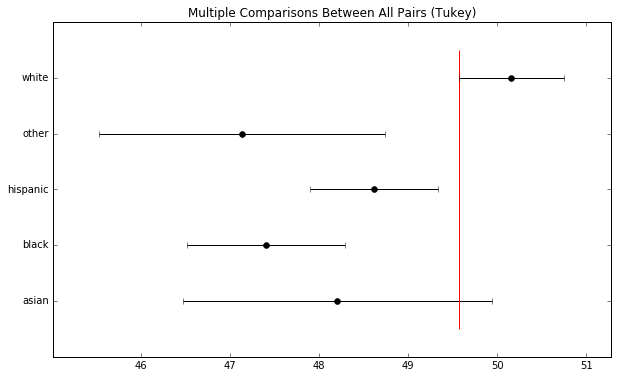

In [6]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
                          groups=voter_race,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

## Parametric vs Non-Parametric Tests

In [34]:
# Mathieu Blondel, February 2012
# License: BSD 3 clause

# Port to Python of examples in chapter 5 of
# "Introductory Statistics with R" by Peter Dalgaard

import numpy as np
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu

print 'P-Values for each test'
# daily intake of energy in kJ for 11 women
daily_intake = np.array([5260,5470,5640,6180,6390,6515,
                         6805,7515,7515,8230,8770])
print 'daily intake'
# one sample t-test
# null hypothesis: expected value = 7725
t_statistic, p_value = ttest_1samp(daily_intake, 7725)

# p_value < 0.05 => alternative hypothesis:
# data deviate significantly from the hypothesis that the mean
# is 7725 at the 5% level of significance
print "one-sample t-test", p_value

# one sample wilcoxon-test
z_statistic, p_value = wilcoxon(daily_intake - 7725)
print "one-sample wilcoxon-test", p_value
print '\nenergy expenditure'
energ = np.array([
# energy expenditure in mJ and stature (0=obese, 1=lean)
[9.21, 0],
[7.53, 1],
[7.48, 1],
[8.08, 1],
[8.09, 1],
[10.15, 1],
[8.40, 1],
[10.88, 1],
[6.13, 1],
[7.90, 1],
[11.51, 0],
[12.79, 0],
[7.05, 1],
[11.85, 0],
[9.97, 0],
[7.48, 1],
[8.79, 0],
[9.69, 0],
[9.68, 0],
[7.58, 1],
[9.19, 0],
[8.11, 1]])

# similar to expend ~ stature in R
group1 = energ[:, 1] == 0
group1 = energ[group1][:, 0]
group2 = energ[:, 1] == 1
group2 = energ[group2][:, 0]

# two-sample t-test
# null hypothesis: the two groups have the same mean
# this test assumes the two groups have the same variance...
# (can be checked with tests for equal variance)
# independent groups: e.g., how boys and girls fare at an exam
# dependent groups: e.g., how the same class fare at 2 different exams
t_statistic, p_value = ttest_ind(group1, group2)

# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print "two-sample t-test", p_value

# two-sample wilcoxon test
# a.k.a Mann Whitney U
u, p_value = mannwhitneyu(group1, group2)
print "unpaired two-sample wilcoxon-test/Mann Whitney U", p_value

# pre and post-menstrual energy intake
intake = np.array([
[5260, 3910],
[5470, 4220],
[5640, 3885],
[6180, 5160],
[6390, 5645],
[6515, 4680],
[6805, 5265],
[7515, 5975],
[7515, 6790],
[8230, 6900],
[8770, 7335],
])
print '\npaired: pre and post-menstrual energy intake'
pre = intake[:, 0]
post = intake[:, 1]

# paired t-test: doing two measurments on the same experimental unit
# e.g., before and after a treatment
t_statistic, p_value = ttest_1samp(post - pre, 0)

# p < 0.05 => alternative hypothesis:
# the difference in mean is not equal to 0
print "paired t-test", p_value

# alternative to paired t-test when data has an ordinary scale or when not
# normally distributed
z_statistic, p_value = wilcoxon(post - pre)

print "paired wilcoxon-test", p_value

P-Values for each test
daily intake
one-sample t-test 0.0181372351761
one-sample wilcoxon-test 0.0261571823293

energy expenditure
two-sample t-test 0.00079899821117
unpaired two-sample wilcoxon-test/Mann Whitney U 0.00106080669294

paired: pre and post-menstrual energy intake
paired t-test 3.05902094293e-07
paired wilcoxon-test 0.00333001391175


is the data normally distributed? for daily intake
test-stat/p-value
(0.952366054058075, 0.674299418926239)


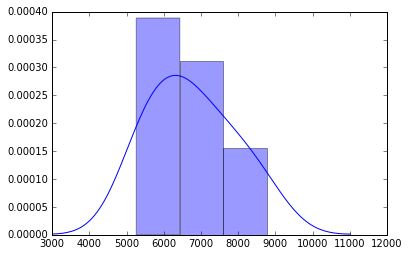

In [30]:
x= daily_intake
shapiro_results = stats.shapiro(x)
sns.distplot(x)
print 'is the data normally distributed? for daily intake'
print 'test-stat/p-value'
print shapiro_results

In [ ]:
#####